In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [7]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [8]:

df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
print("Mean Total Amount:", df['Total Amount'].mean())
print("Median Total Amount:", df['Total Amount'].median())
print("Standard Deviation:", df['Total Amount'].std())


Mean Total Amount: 456.0
Median Total Amount: 135.0
Standard Deviation: 559.997631555123


**Time series Analysis(Monthly sales)**

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Amount'].sum()

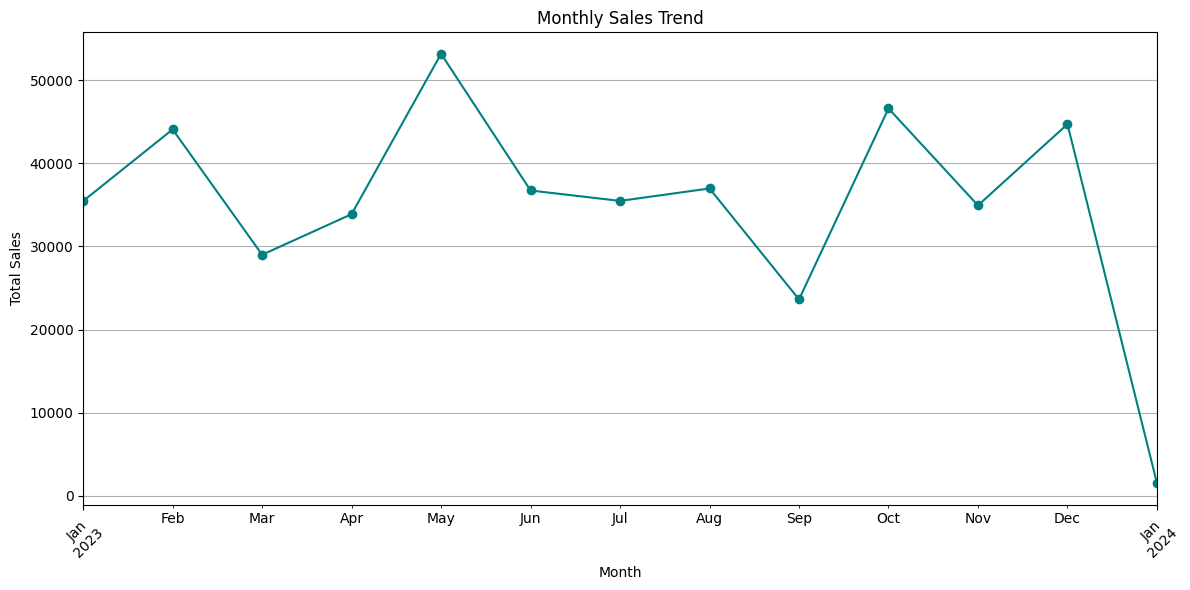

In [14]:
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Customer Demographics Analysis**

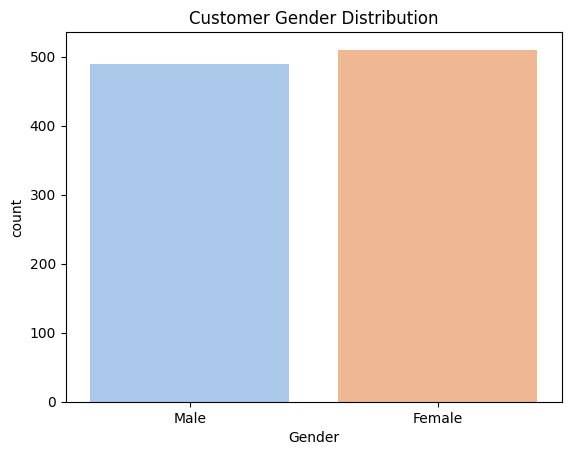

In [15]:
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Customer Gender Distribution")
plt.show()


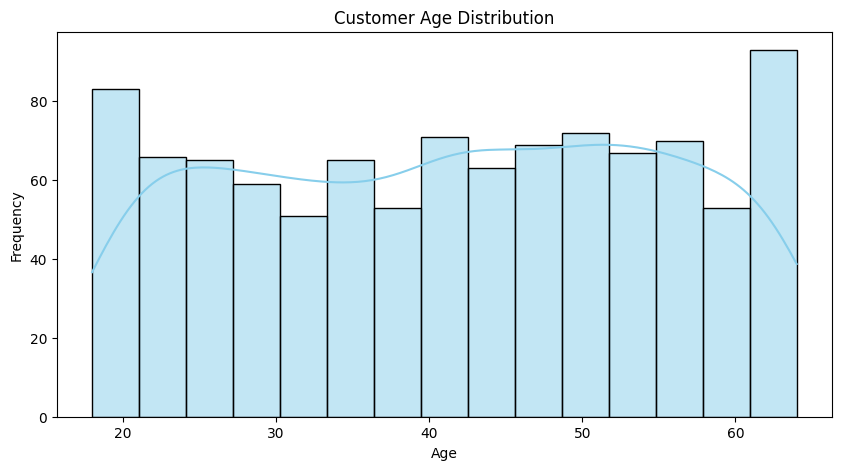

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Product Category Insights**

In [19]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values()


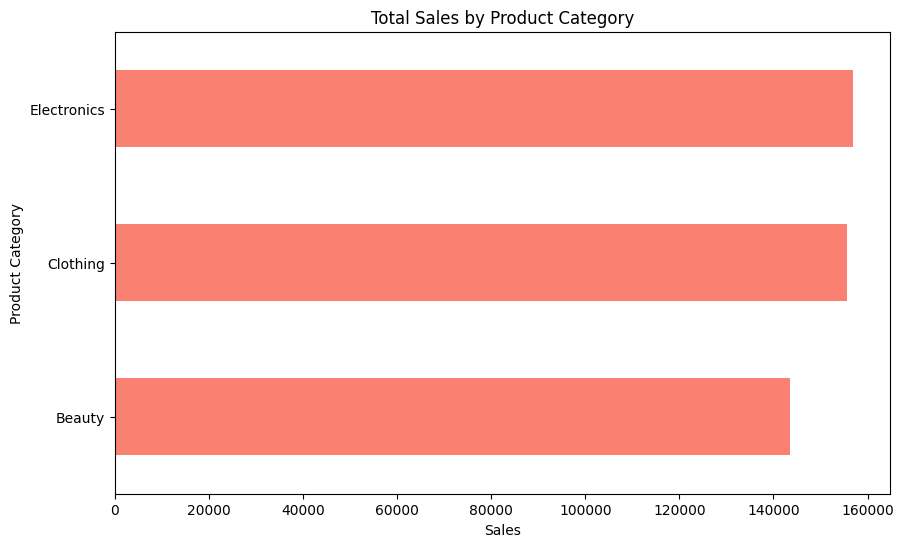

In [20]:
category_sales.plot(kind='barh', color='salmon', figsize=(10,6))
plt.title("Total Sales by Product Category")
plt.xlabel("Sales")
plt.show()

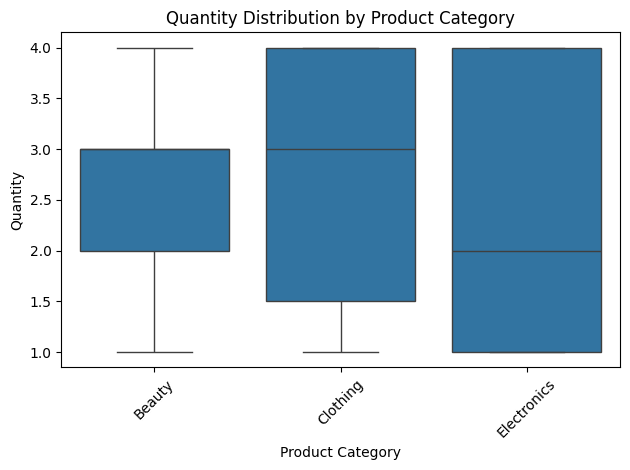

In [21]:
sns.boxplot(x='Product Category', y='Quantity', data=df)
plt.title("Quantity Distribution by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Price & Profit Insights**

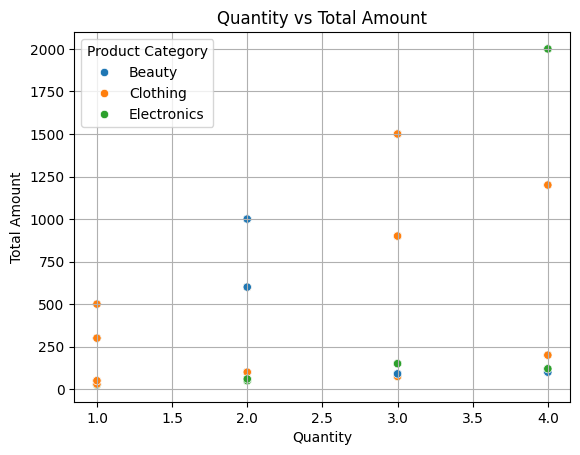

In [22]:
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category')
plt.title("Quantity vs Total Amount")
plt.grid(True)
plt.show()


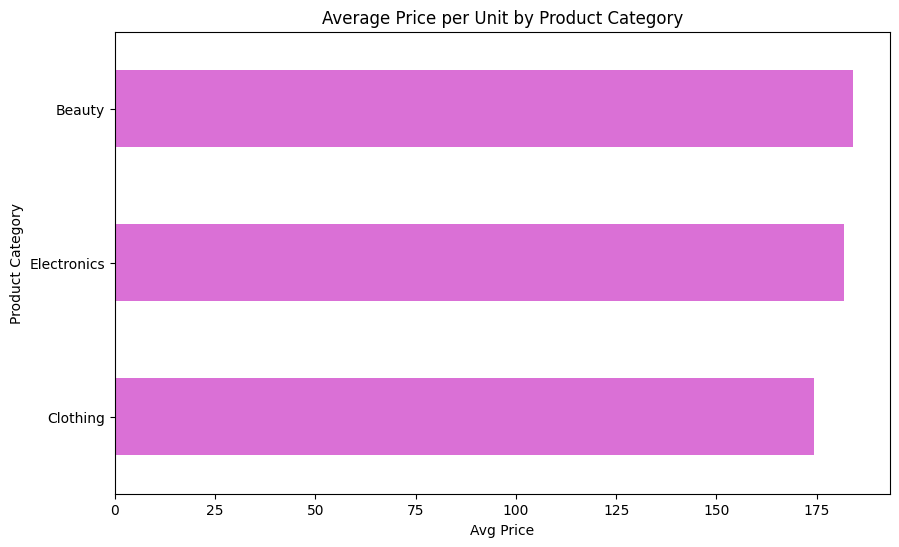

In [23]:
avg_price = df.groupby('Product Category')['Price per Unit'].mean().sort_values()
avg_price.plot(kind='barh', color='orchid', figsize=(10,6))
plt.title("Average Price per Unit by Product Category")
plt.xlabel("Avg Price")
plt.show()


In [26]:
recommendations = [
    "-Beauty and Clothing categories show consistent sales — continue stocking these.",
    "-Electronics are high priced but less frequent — push offers/discounts.",
    "-Age 30–50 is the dominant customer segment — tailor promotions accordingly.",
    "-Sales peak observed during Nov–Dec — consider seasonal marketing campaigns.",
    "-Male customers slightly dominate, but gender distribution is balanced — keep offers inclusive."
]

for line in recommendations:
    print(line)


-Beauty and Clothing categories show consistent sales — continue stocking these.
-Electronics are high priced but less frequent — push offers/discounts.
-Age 30–50 is the dominant customer segment — tailor promotions accordingly.
-Sales peak observed during Nov–Dec — consider seasonal marketing campaigns.
-Male customers slightly dominate, but gender distribution is balanced — keep offers inclusive.


In [27]:
df = pd.read_csv("menu.csv")
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [29]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [30]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [31]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [32]:
print("Average Calories:", df['Calories'].mean())
print("Average Total Fat:", df['Total Fat'].mean())
print("Average Protein:", df['Protein'].mean())

Average Calories: 368.2692307692308
Average Total Fat: 14.165384615384616
Average Protein: 13.338461538461539


**Category wise Nutritional Analysis**

In [33]:
avg_calories = df.groupby('Category')['Calories'].mean().sort_values()

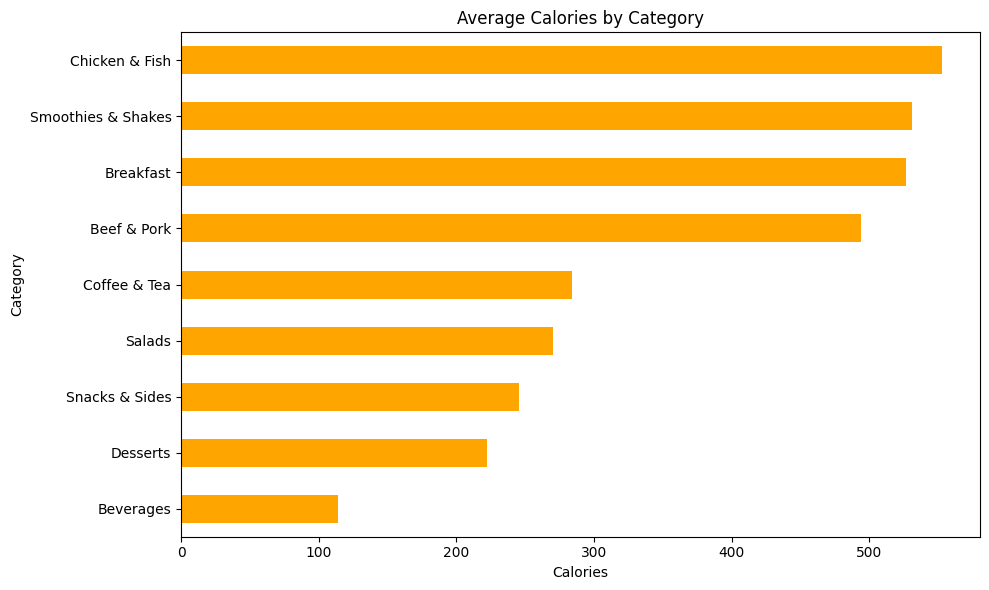

In [34]:
avg_calories.plot(kind='barh', figsize=(10,6), color='orange')
plt.title("Average Calories by Category")
plt.xlabel("Calories")
plt.tight_layout()
plt.show()

In [35]:
fat_sugar = df.groupby('Category')[['Total Fat', 'Sugars']].mean().sort_values(by='Total Fat')

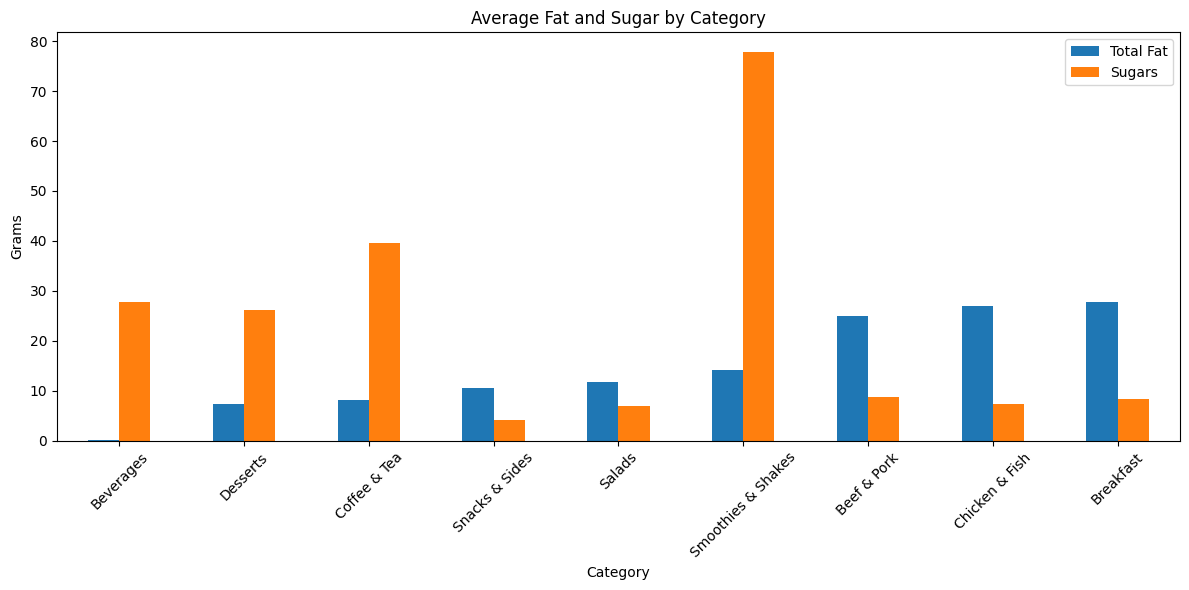

In [36]:
fat_sugar.plot(kind='bar', figsize=(12,6))
plt.title("Average Fat and Sugar by Category")
plt.ylabel("Grams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution plots**

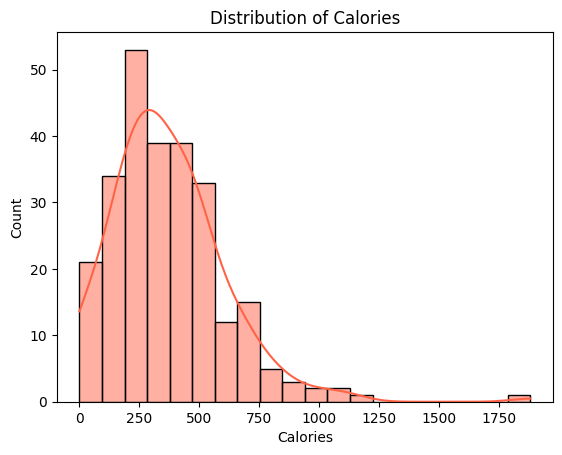

In [37]:
sns.histplot(df['Calories'], bins=20, kde=True, color='tomato')
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.show()


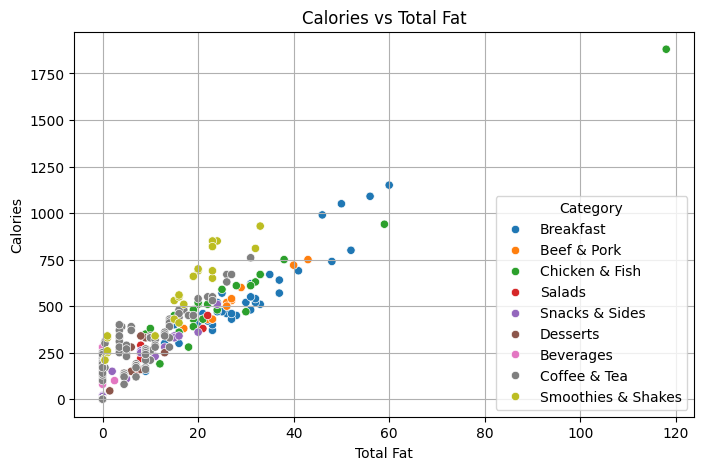

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total Fat', y='Calories', hue='Category')
plt.title("Calories vs Total Fat")
plt.grid(True)
plt.show()


**Protein vs Calories**

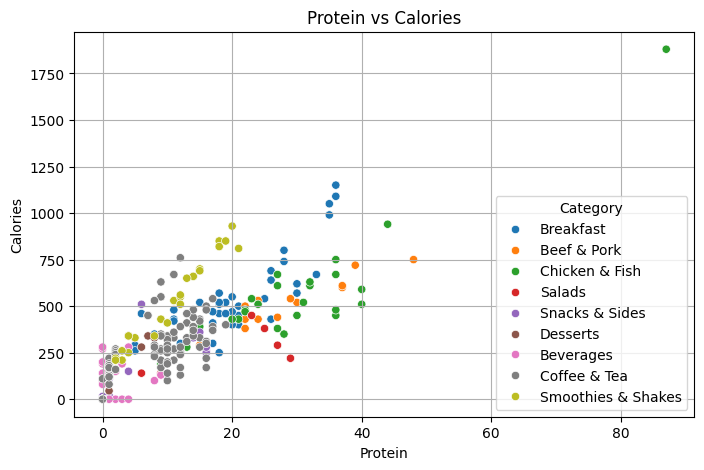

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Protein', y='Calories', hue='Category')
plt.title("Protein vs Calories")
plt.grid(True)
plt.show()


**Insights**

In [40]:
insights = [
    "-Breakfast items are relatively high in fat but moderate in calories.",
    "-Beverages have low protein but high sugar content — moderation advised.",
    "-Burgers and sandwiches are calorie-dense but offer good protein levels.",
    "-Sides like fries are high in fat but low in other nutritional value.",
    "-Some items are surprisingly high in calories due to large serving sizes."
]

for line in insights:
    print(line)


-Breakfast items are relatively high in fat but moderate in calories.
-Beverages have low protein but high sugar content — moderation advised.
-Burgers and sandwiches are calorie-dense but offer good protein levels.
-Sides like fries are high in fat but low in other nutritional value.
-Some items are surprisingly high in calories due to large serving sizes.
